## Import Libraries 

In [1]:
import warnings
import sys
sys.path.insert(0, '../../src')
warnings.filterwarnings('ignore')

In [2]:
import ABC_train_test2
import californiaDataset
import network
import dataset
import sanityChecks
import performanceMetrics
import torch 
from torch.utils.data import random_split 
import scrapbook as sb
from statistics import mean 
import catboost as ctb 
from sklearn.model_selection import train_test_split

## Parameters 

In [3]:
variance = 1

In [4]:
# Parameters
variance = 0.1


## Dataset - California Dataset 

In [5]:
#Parameters 
n_features = 8
n_samples= 20640
n_target = 1 

In [6]:
X,Y = californiaDataset.california_data()

       X1    X2        X3        X4      X5        X6     X7      X8      Y
0  8.3252  41.0  6.984127  1.023810   322.0  2.555556  37.88 -122.23  4.526
1  8.3014  21.0  6.238137  0.971880  2401.0  2.109842  37.86 -122.22  3.585
2  7.2574  52.0  8.288136  1.073446   496.0  2.802260  37.85 -122.24  3.521
3  5.6431  52.0  5.817352  1.073059   558.0  2.547945  37.85 -122.25  3.413
4  3.8462  52.0  6.281853  1.081081   565.0  2.181467  37.85 -122.25  3.422


In [7]:
#Train test split for dataset 
real_dataset = dataset.CustomDataset(X,Y)
train_size = round(0.8 * n_samples)
test_size = n_samples - train_size
train_data, test_data = random_split(real_dataset,[train_size,test_size])

## Training Parameters 

In [8]:
batch_size = 5000
n_epochs = 100
#Select the device 
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# ABC Pre-generator Model 

1. The catboost model is used as a pre-generator model for the ABC-GAN. 
2. The model is first trained on the entire dataset 
3. It generats X,Y pairs and we add some Gaussian noise with mean 0 and variance 1 to it which is then feed as input to the generator.


In [9]:
#Train the Model 
prior_model = ctb.CatBoostRegressor()
prior_model.fit(X,Y)

Learning rate set to 0.066055
0:	learn: 0.9629179	total: 51.6ms	remaining: 51.5s
1:	learn: 0.9301086	total: 55.7ms	remaining: 27.8s
2:	learn: 0.9005637	total: 59.1ms	remaining: 19.6s
3:	learn: 0.8720983	total: 62.9ms	remaining: 15.7s
4:	learn: 0.8467410	total: 66.3ms	remaining: 13.2s
5:	learn: 0.8226672	total: 69.4ms	remaining: 11.5s
6:	learn: 0.7994702	total: 72.5ms	remaining: 10.3s
7:	learn: 0.7784272	total: 75.5ms	remaining: 9.36s
8:	learn: 0.7602192	total: 78.7ms	remaining: 8.66s
9:	learn: 0.7412421	total: 81.8ms	remaining: 8.09s
10:	learn: 0.7247930	total: 84.7ms	remaining: 7.61s
11:	learn: 0.7089951	total: 87.9ms	remaining: 7.23s
12:	learn: 0.6951345	total: 90.8ms	remaining: 6.9s
13:	learn: 0.6809276	total: 93.9ms	remaining: 6.61s
14:	learn: 0.6692630	total: 96.9ms	remaining: 6.36s
15:	learn: 0.6588323	total: 100ms	remaining: 6.17s
16:	learn: 0.6472700	total: 103ms	remaining: 5.98s
17:	learn: 0.6379982	total: 107ms	remaining: 5.81s
18:	learn: 0.6294674	total: 110ms	remaining: 5.6

42:	learn: 0.5141148	total: 186ms	remaining: 4.14s
43:	learn: 0.5116444	total: 189ms	remaining: 4.11s
44:	learn: 0.5100547	total: 192ms	remaining: 4.08s
45:	learn: 0.5069096	total: 195ms	remaining: 4.05s
46:	learn: 0.5051685	total: 198ms	remaining: 4.02s
47:	learn: 0.5033968	total: 201ms	remaining: 3.99s
48:	learn: 0.5012433	total: 204ms	remaining: 3.97s
49:	learn: 0.4986132	total: 208ms	remaining: 3.94s
50:	learn: 0.4968022	total: 211ms	remaining: 3.92s
51:	learn: 0.4951632	total: 214ms	remaining: 3.9s
52:	learn: 0.4928924	total: 217ms	remaining: 3.88s
53:	learn: 0.4917272	total: 220ms	remaining: 3.86s
54:	learn: 0.4895079	total: 224ms	remaining: 3.84s
55:	learn: 0.4881884	total: 227ms	remaining: 3.82s
56:	learn: 0.4861566	total: 230ms	remaining: 3.8s
57:	learn: 0.4850201	total: 233ms	remaining: 3.78s
58:	learn: 0.4840055	total: 236ms	remaining: 3.76s
59:	learn: 0.4824455	total: 239ms	remaining: 3.74s
60:	learn: 0.4809744	total: 242ms	remaining: 3.73s
61:	learn: 0.4801376	total: 245ms

101:	learn: 0.4481325	total: 376ms	remaining: 3.31s
102:	learn: 0.4475445	total: 380ms	remaining: 3.31s
103:	learn: 0.4466014	total: 383ms	remaining: 3.3s
104:	learn: 0.4461730	total: 387ms	remaining: 3.29s
105:	learn: 0.4457259	total: 390ms	remaining: 3.29s
106:	learn: 0.4451085	total: 393ms	remaining: 3.28s
107:	learn: 0.4447909	total: 396ms	remaining: 3.27s
108:	learn: 0.4440936	total: 399ms	remaining: 3.26s
109:	learn: 0.4435519	total: 402ms	remaining: 3.25s
110:	learn: 0.4431075	total: 405ms	remaining: 3.24s
111:	learn: 0.4425498	total: 408ms	remaining: 3.23s
112:	learn: 0.4419106	total: 411ms	remaining: 3.23s
113:	learn: 0.4414425	total: 414ms	remaining: 3.22s
114:	learn: 0.4407446	total: 417ms	remaining: 3.21s
115:	learn: 0.4402011	total: 420ms	remaining: 3.2s
116:	learn: 0.4398559	total: 423ms	remaining: 3.19s
117:	learn: 0.4392990	total: 426ms	remaining: 3.18s
118:	learn: 0.4389153	total: 429ms	remaining: 3.17s
119:	learn: 0.4383331	total: 432ms	remaining: 3.17s
120:	learn: 0.

157:	learn: 0.4218088	total: 553ms	remaining: 2.94s
158:	learn: 0.4213239	total: 556ms	remaining: 2.94s
159:	learn: 0.4210022	total: 559ms	remaining: 2.93s
160:	learn: 0.4201256	total: 562ms	remaining: 2.93s
161:	learn: 0.4197073	total: 565ms	remaining: 2.92s
162:	learn: 0.4192052	total: 568ms	remaining: 2.91s
163:	learn: 0.4187949	total: 571ms	remaining: 2.91s
164:	learn: 0.4184572	total: 574ms	remaining: 2.9s
165:	learn: 0.4180680	total: 577ms	remaining: 2.9s
166:	learn: 0.4176884	total: 579ms	remaining: 2.89s
167:	learn: 0.4173026	total: 583ms	remaining: 2.88s
168:	learn: 0.4170486	total: 586ms	remaining: 2.88s
169:	learn: 0.4165960	total: 589ms	remaining: 2.87s
170:	learn: 0.4161870	total: 592ms	remaining: 2.87s
171:	learn: 0.4156228	total: 595ms	remaining: 2.86s
172:	learn: 0.4153041	total: 598ms	remaining: 2.86s
173:	learn: 0.4148857	total: 601ms	remaining: 2.85s
174:	learn: 0.4144190	total: 604ms	remaining: 2.85s
175:	learn: 0.4140875	total: 607ms	remaining: 2.84s
176:	learn: 0.

219:	learn: 0.3986243	total: 741ms	remaining: 2.63s
220:	learn: 0.3982897	total: 744ms	remaining: 2.62s
221:	learn: 0.3981001	total: 747ms	remaining: 2.62s
222:	learn: 0.3978579	total: 751ms	remaining: 2.62s
223:	learn: 0.3976462	total: 754ms	remaining: 2.61s
224:	learn: 0.3973704	total: 757ms	remaining: 2.61s
225:	learn: 0.3971729	total: 760ms	remaining: 2.6s
226:	learn: 0.3968841	total: 763ms	remaining: 2.6s
227:	learn: 0.3965787	total: 765ms	remaining: 2.59s
228:	learn: 0.3963073	total: 768ms	remaining: 2.59s
229:	learn: 0.3960925	total: 771ms	remaining: 2.58s
230:	learn: 0.3957018	total: 775ms	remaining: 2.58s
231:	learn: 0.3954162	total: 777ms	remaining: 2.57s
232:	learn: 0.3951665	total: 780ms	remaining: 2.57s
233:	learn: 0.3949269	total: 783ms	remaining: 2.56s
234:	learn: 0.3945894	total: 786ms	remaining: 2.56s
235:	learn: 0.3944181	total: 789ms	remaining: 2.55s
236:	learn: 0.3941497	total: 792ms	remaining: 2.55s
237:	learn: 0.3939819	total: 796ms	remaining: 2.55s
238:	learn: 0.

280:	learn: 0.3839018	total: 933ms	remaining: 2.39s
281:	learn: 0.3836780	total: 936ms	remaining: 2.38s
282:	learn: 0.3832767	total: 940ms	remaining: 2.38s
283:	learn: 0.3831676	total: 943ms	remaining: 2.38s
284:	learn: 0.3830010	total: 946ms	remaining: 2.37s
285:	learn: 0.3826742	total: 949ms	remaining: 2.37s
286:	learn: 0.3824534	total: 952ms	remaining: 2.37s
287:	learn: 0.3821767	total: 955ms	remaining: 2.36s
288:	learn: 0.3819748	total: 958ms	remaining: 2.36s
289:	learn: 0.3817667	total: 962ms	remaining: 2.35s
290:	learn: 0.3815253	total: 965ms	remaining: 2.35s
291:	learn: 0.3813529	total: 968ms	remaining: 2.35s
292:	learn: 0.3812172	total: 971ms	remaining: 2.34s
293:	learn: 0.3809978	total: 975ms	remaining: 2.34s
294:	learn: 0.3807825	total: 978ms	remaining: 2.34s
295:	learn: 0.3805940	total: 981ms	remaining: 2.33s
296:	learn: 0.3801959	total: 984ms	remaining: 2.33s
297:	learn: 0.3799439	total: 987ms	remaining: 2.33s
298:	learn: 0.3797228	total: 990ms	remaining: 2.32s
299:	learn: 

342:	learn: 0.3714592	total: 1.13s	remaining: 2.16s
343:	learn: 0.3713389	total: 1.13s	remaining: 2.15s
344:	learn: 0.3711642	total: 1.13s	remaining: 2.15s
345:	learn: 0.3709569	total: 1.14s	remaining: 2.15s
346:	learn: 0.3708184	total: 1.14s	remaining: 2.14s
347:	learn: 0.3705958	total: 1.14s	remaining: 2.14s
348:	learn: 0.3703798	total: 1.14s	remaining: 2.13s
349:	learn: 0.3701923	total: 1.15s	remaining: 2.13s
350:	learn: 0.3700067	total: 1.15s	remaining: 2.13s
351:	learn: 0.3698930	total: 1.15s	remaining: 2.12s
352:	learn: 0.3697314	total: 1.16s	remaining: 2.12s
353:	learn: 0.3695617	total: 1.16s	remaining: 2.12s
354:	learn: 0.3694397	total: 1.16s	remaining: 2.11s
355:	learn: 0.3692589	total: 1.17s	remaining: 2.11s
356:	learn: 0.3691107	total: 1.17s	remaining: 2.1s
357:	learn: 0.3689645	total: 1.17s	remaining: 2.1s
358:	learn: 0.3687886	total: 1.18s	remaining: 2.1s
359:	learn: 0.3686485	total: 1.18s	remaining: 2.09s
360:	learn: 0.3685749	total: 1.18s	remaining: 2.09s
361:	learn: 0.3

404:	learn: 0.3614255	total: 1.32s	remaining: 1.93s
405:	learn: 0.3613607	total: 1.32s	remaining: 1.93s
406:	learn: 0.3612875	total: 1.32s	remaining: 1.93s
407:	learn: 0.3611516	total: 1.32s	remaining: 1.92s
408:	learn: 0.3609621	total: 1.33s	remaining: 1.92s
409:	learn: 0.3608193	total: 1.33s	remaining: 1.92s
410:	learn: 0.3604920	total: 1.33s	remaining: 1.91s
411:	learn: 0.3603038	total: 1.34s	remaining: 1.91s
412:	learn: 0.3602055	total: 1.34s	remaining: 1.91s
413:	learn: 0.3599094	total: 1.34s	remaining: 1.9s
414:	learn: 0.3597887	total: 1.35s	remaining: 1.9s
415:	learn: 0.3595791	total: 1.35s	remaining: 1.9s
416:	learn: 0.3594487	total: 1.35s	remaining: 1.89s
417:	learn: 0.3592759	total: 1.36s	remaining: 1.89s
418:	learn: 0.3591088	total: 1.36s	remaining: 1.89s
419:	learn: 0.3589470	total: 1.36s	remaining: 1.88s
420:	learn: 0.3587972	total: 1.37s	remaining: 1.88s
421:	learn: 0.3586831	total: 1.37s	remaining: 1.88s
422:	learn: 0.3585620	total: 1.37s	remaining: 1.87s
423:	learn: 0.3

466:	learn: 0.3525102	total: 1.51s	remaining: 1.72s
467:	learn: 0.3523547	total: 1.51s	remaining: 1.72s
468:	learn: 0.3522115	total: 1.51s	remaining: 1.72s
469:	learn: 0.3521029	total: 1.52s	remaining: 1.71s
470:	learn: 0.3519673	total: 1.52s	remaining: 1.71s
471:	learn: 0.3518082	total: 1.52s	remaining: 1.71s
472:	learn: 0.3516593	total: 1.53s	remaining: 1.7s
473:	learn: 0.3514906	total: 1.53s	remaining: 1.7s
474:	learn: 0.3513843	total: 1.53s	remaining: 1.7s
475:	learn: 0.3512406	total: 1.54s	remaining: 1.69s
476:	learn: 0.3510044	total: 1.54s	remaining: 1.69s
477:	learn: 0.3509121	total: 1.54s	remaining: 1.69s
478:	learn: 0.3507270	total: 1.55s	remaining: 1.68s
479:	learn: 0.3506003	total: 1.55s	remaining: 1.68s
480:	learn: 0.3505111	total: 1.55s	remaining: 1.68s
481:	learn: 0.3503906	total: 1.55s	remaining: 1.67s
482:	learn: 0.3501522	total: 1.56s	remaining: 1.67s
483:	learn: 0.3500494	total: 1.56s	remaining: 1.66s
484:	learn: 0.3498921	total: 1.56s	remaining: 1.66s
485:	learn: 0.3

527:	learn: 0.3443508	total: 1.7s	remaining: 1.52s
528:	learn: 0.3442153	total: 1.7s	remaining: 1.51s
529:	learn: 0.3441108	total: 1.7s	remaining: 1.51s
530:	learn: 0.3439546	total: 1.71s	remaining: 1.51s
531:	learn: 0.3438254	total: 1.71s	remaining: 1.5s
532:	learn: 0.3437049	total: 1.71s	remaining: 1.5s
533:	learn: 0.3435053	total: 1.72s	remaining: 1.5s
534:	learn: 0.3433236	total: 1.72s	remaining: 1.49s
535:	learn: 0.3432219	total: 1.72s	remaining: 1.49s
536:	learn: 0.3431615	total: 1.73s	remaining: 1.49s
537:	learn: 0.3430198	total: 1.73s	remaining: 1.48s
538:	learn: 0.3429422	total: 1.73s	remaining: 1.48s
539:	learn: 0.3428024	total: 1.73s	remaining: 1.48s
540:	learn: 0.3426641	total: 1.74s	remaining: 1.47s
541:	learn: 0.3425885	total: 1.74s	remaining: 1.47s
542:	learn: 0.3424695	total: 1.74s	remaining: 1.47s
543:	learn: 0.3423997	total: 1.75s	remaining: 1.46s
544:	learn: 0.3422315	total: 1.75s	remaining: 1.46s
545:	learn: 0.3421242	total: 1.75s	remaining: 1.46s
546:	learn: 0.3419

588:	learn: 0.3375696	total: 1.89s	remaining: 1.32s
589:	learn: 0.3374902	total: 1.89s	remaining: 1.31s
590:	learn: 0.3373056	total: 1.89s	remaining: 1.31s
591:	learn: 0.3371913	total: 1.9s	remaining: 1.31s
592:	learn: 0.3371272	total: 1.9s	remaining: 1.3s
593:	learn: 0.3370368	total: 1.9s	remaining: 1.3s
594:	learn: 0.3368150	total: 1.91s	remaining: 1.3s
595:	learn: 0.3367491	total: 1.91s	remaining: 1.29s
596:	learn: 0.3366496	total: 1.91s	remaining: 1.29s
597:	learn: 0.3365561	total: 1.92s	remaining: 1.29s
598:	learn: 0.3364801	total: 1.92s	remaining: 1.28s
599:	learn: 0.3363937	total: 1.92s	remaining: 1.28s
600:	learn: 0.3363054	total: 1.92s	remaining: 1.28s
601:	learn: 0.3361892	total: 1.93s	remaining: 1.27s
602:	learn: 0.3360683	total: 1.93s	remaining: 1.27s
603:	learn: 0.3359807	total: 1.93s	remaining: 1.27s
604:	learn: 0.3359096	total: 1.94s	remaining: 1.26s
605:	learn: 0.3358268	total: 1.94s	remaining: 1.26s
606:	learn: 0.3356597	total: 1.94s	remaining: 1.26s
607:	learn: 0.3355

651:	learn: 0.3310386	total: 2.08s	remaining: 1.11s
652:	learn: 0.3309129	total: 2.08s	remaining: 1.11s
653:	learn: 0.3308321	total: 2.08s	remaining: 1.1s
654:	learn: 0.3307342	total: 2.09s	remaining: 1.1s
655:	learn: 0.3306809	total: 2.09s	remaining: 1.1s
656:	learn: 0.3305729	total: 2.09s	remaining: 1.09s
657:	learn: 0.3304900	total: 2.1s	remaining: 1.09s
658:	learn: 0.3303842	total: 2.1s	remaining: 1.09s
659:	learn: 0.3302235	total: 2.1s	remaining: 1.08s
660:	learn: 0.3300983	total: 2.1s	remaining: 1.08s
661:	learn: 0.3299994	total: 2.11s	remaining: 1.08s
662:	learn: 0.3299184	total: 2.11s	remaining: 1.07s
663:	learn: 0.3298189	total: 2.11s	remaining: 1.07s
664:	learn: 0.3296970	total: 2.12s	remaining: 1.07s
665:	learn: 0.3296671	total: 2.12s	remaining: 1.06s
666:	learn: 0.3295999	total: 2.12s	remaining: 1.06s
667:	learn: 0.3295390	total: 2.13s	remaining: 1.06s
668:	learn: 0.3294195	total: 2.13s	remaining: 1.05s
669:	learn: 0.3293185	total: 2.13s	remaining: 1.05s
670:	learn: 0.32920

712:	learn: 0.3253361	total: 2.26s	remaining: 912ms
713:	learn: 0.3252431	total: 2.27s	remaining: 908ms
714:	learn: 0.3251186	total: 2.27s	remaining: 905ms
715:	learn: 0.3250323	total: 2.27s	remaining: 902ms
716:	learn: 0.3249511	total: 2.28s	remaining: 899ms
717:	learn: 0.3248372	total: 2.28s	remaining: 896ms
718:	learn: 0.3247371	total: 2.28s	remaining: 893ms
719:	learn: 0.3246676	total: 2.29s	remaining: 889ms
720:	learn: 0.3245862	total: 2.29s	remaining: 886ms
721:	learn: 0.3245270	total: 2.29s	remaining: 883ms
722:	learn: 0.3244558	total: 2.3s	remaining: 880ms
723:	learn: 0.3243835	total: 2.3s	remaining: 877ms
724:	learn: 0.3242957	total: 2.3s	remaining: 874ms
725:	learn: 0.3242628	total: 2.31s	remaining: 870ms
726:	learn: 0.3242076	total: 2.31s	remaining: 867ms
727:	learn: 0.3240923	total: 2.31s	remaining: 864ms
728:	learn: 0.3240148	total: 2.31s	remaining: 861ms
729:	learn: 0.3239014	total: 2.32s	remaining: 857ms
730:	learn: 0.3237918	total: 2.32s	remaining: 854ms
731:	learn: 0.3

775:	learn: 0.3198135	total: 2.46s	remaining: 709ms
776:	learn: 0.3197430	total: 2.46s	remaining: 706ms
777:	learn: 0.3196478	total: 2.46s	remaining: 703ms
778:	learn: 0.3194714	total: 2.46s	remaining: 699ms
779:	learn: 0.3194042	total: 2.47s	remaining: 696ms
780:	learn: 0.3193209	total: 2.47s	remaining: 693ms
781:	learn: 0.3192009	total: 2.47s	remaining: 690ms
782:	learn: 0.3191109	total: 2.48s	remaining: 687ms
783:	learn: 0.3190255	total: 2.49s	remaining: 686ms
784:	learn: 0.3189403	total: 2.49s	remaining: 683ms
785:	learn: 0.3188715	total: 2.5s	remaining: 680ms
786:	learn: 0.3188016	total: 2.5s	remaining: 677ms
787:	learn: 0.3187670	total: 2.5s	remaining: 674ms
788:	learn: 0.3186601	total: 2.51s	remaining: 671ms
789:	learn: 0.3185886	total: 2.51s	remaining: 668ms
790:	learn: 0.3185418	total: 2.52s	remaining: 665ms
791:	learn: 0.3184514	total: 2.52s	remaining: 662ms
792:	learn: 0.3183529	total: 2.52s	remaining: 659ms
793:	learn: 0.3182569	total: 2.53s	remaining: 656ms
794:	learn: 0.3

832:	learn: 0.3150922	total: 2.65s	remaining: 531ms
833:	learn: 0.3149588	total: 2.65s	remaining: 528ms
834:	learn: 0.3149074	total: 2.66s	remaining: 525ms
835:	learn: 0.3148291	total: 2.66s	remaining: 522ms
836:	learn: 0.3147707	total: 2.66s	remaining: 519ms
837:	learn: 0.3147022	total: 2.67s	remaining: 515ms
838:	learn: 0.3145737	total: 2.67s	remaining: 512ms
839:	learn: 0.3144908	total: 2.67s	remaining: 509ms
840:	learn: 0.3144038	total: 2.67s	remaining: 506ms
841:	learn: 0.3143434	total: 2.68s	remaining: 503ms
842:	learn: 0.3142662	total: 2.68s	remaining: 499ms
843:	learn: 0.3141532	total: 2.68s	remaining: 496ms
844:	learn: 0.3140919	total: 2.69s	remaining: 493ms
845:	learn: 0.3140384	total: 2.69s	remaining: 490ms
846:	learn: 0.3139822	total: 2.69s	remaining: 487ms
847:	learn: 0.3138839	total: 2.7s	remaining: 483ms
848:	learn: 0.3138291	total: 2.7s	remaining: 480ms
849:	learn: 0.3137772	total: 2.7s	remaining: 477ms
850:	learn: 0.3137138	total: 2.71s	remaining: 474ms
851:	learn: 0.3

892:	learn: 0.3105421	total: 2.84s	remaining: 340ms
893:	learn: 0.3104659	total: 2.84s	remaining: 337ms
894:	learn: 0.3104028	total: 2.85s	remaining: 334ms
895:	learn: 0.3103186	total: 2.85s	remaining: 331ms
896:	learn: 0.3102488	total: 2.85s	remaining: 328ms
897:	learn: 0.3101565	total: 2.85s	remaining: 324ms
898:	learn: 0.3100955	total: 2.86s	remaining: 321ms
899:	learn: 0.3100512	total: 2.86s	remaining: 318ms
900:	learn: 0.3100138	total: 2.86s	remaining: 315ms
901:	learn: 0.3099635	total: 2.87s	remaining: 312ms
902:	learn: 0.3098989	total: 2.87s	remaining: 308ms
903:	learn: 0.3098084	total: 2.87s	remaining: 305ms
904:	learn: 0.3097402	total: 2.88s	remaining: 302ms
905:	learn: 0.3096378	total: 2.88s	remaining: 299ms
906:	learn: 0.3095878	total: 2.88s	remaining: 296ms
907:	learn: 0.3095154	total: 2.89s	remaining: 292ms
908:	learn: 0.3094688	total: 2.89s	remaining: 289ms
909:	learn: 0.3093784	total: 2.89s	remaining: 286ms
910:	learn: 0.3093058	total: 2.9s	remaining: 283ms
911:	learn: 0

954:	learn: 0.3061348	total: 3.03s	remaining: 143ms
955:	learn: 0.3060576	total: 3.03s	remaining: 140ms
956:	learn: 0.3059772	total: 3.04s	remaining: 136ms
957:	learn: 0.3058989	total: 3.04s	remaining: 133ms
958:	learn: 0.3057985	total: 3.04s	remaining: 130ms
959:	learn: 0.3056692	total: 3.05s	remaining: 127ms
960:	learn: 0.3055777	total: 3.05s	remaining: 124ms
961:	learn: 0.3054462	total: 3.05s	remaining: 121ms
962:	learn: 0.3053516	total: 3.06s	remaining: 117ms
963:	learn: 0.3052664	total: 3.06s	remaining: 114ms
964:	learn: 0.3052264	total: 3.06s	remaining: 111ms
965:	learn: 0.3051873	total: 3.06s	remaining: 108ms
966:	learn: 0.3051018	total: 3.07s	remaining: 105ms
967:	learn: 0.3050172	total: 3.07s	remaining: 102ms
968:	learn: 0.3049470	total: 3.07s	remaining: 98.4ms
969:	learn: 0.3049028	total: 3.08s	remaining: 95.2ms
970:	learn: 0.3048446	total: 3.08s	remaining: 92ms
971:	learn: 0.3047712	total: 3.08s	remaining: 88.8ms
972:	learn: 0.3047313	total: 3.09s	remaining: 85.7ms
973:	lear

# ABC GAN Model

### Training the network
**Training ABC-GAN for n_epochs number of epochs** 

In [10]:
gen = network.Generator(n_features+1).to(device)
disc = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen.parameters(), lr=0.1, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc.parameters(), lr=0.1, betas=(0.5, 0.999))

In [11]:
#Training the ABC_GAN 
discLossA1,genLossA1 = ABC_train_test2.training_GAN(disc,gen,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,device)
sb.glue("ABC_GAN_1 Generator Loss",genLossA1)
sb.glue("ABC_GAN_1 Discriminator Loss",discLossA1)

In [12]:
ABC_GAN1_metrics=ABC_train_test2.test_generator(gen,test_data,prior_model,variance,"1",device)
sb.glue("ABC_GAN_1 Metrics",ABC_GAN1_metrics)

print("MSE")
print(mean(ABC_GAN1_metrics[0]))

MSE
1.0295238692636233


#### Sanity Checks 

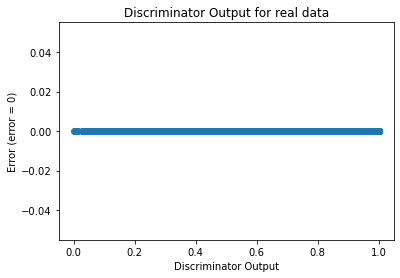

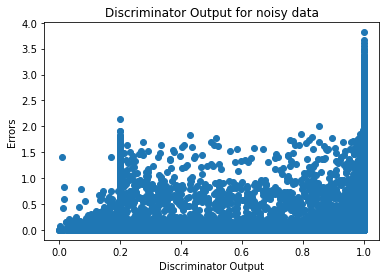

In [13]:
sanityChecks.discProbVsError(real_dataset,disc,device)